In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [19]:
ts_fb= pd.read_csv('https://www.dropbox.com/s/j04e6thkqmk02z1/LPL.csv?dl=1', header=0, index_col=0, parse_dates=True,
squeeze=True)
ts_fb.head()

/tmp/ipykernel_6481/2970525184.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts_fb= pd.read_csv('https://www.dropbox.com/s/j04e6thkqmk02z1/LPL.csv?dl=1', header=0, index_col=0, parse_dates=True,


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,8.78,8.80,8.60,8.66,8.66,256300
2021-01-05,8.59,8.65,8.56,8.64,8.64,168200
2021-01-06,8.86,9.03,8.84,8.96,8.96,522200
2021-01-07,9.08,9.17,9.05,9.16,9.16,305200
2021-01-08,9.15,9.27,9.14,9.21,9.21,530800


In [49]:
ts_fb['Open']['2021-01']


Date
2021-01-04     8.78
2021-01-05     8.59
2021-01-06     8.86
2021-01-07     9.08
2021-01-08     9.15
2021-01-11     8.93
2021-01-12     9.10
2021-01-13     9.27
2021-01-14     9.75
2021-01-15     9.55
2021-01-19     9.57
2021-01-20     9.72
2021-01-21    10.50
2021-01-22    10.57
2021-01-25    10.65
2021-01-26    10.86
2021-01-27    10.23
2021-01-28    10.12
2021-01-29     9.76
Name: Open, dtype: float64

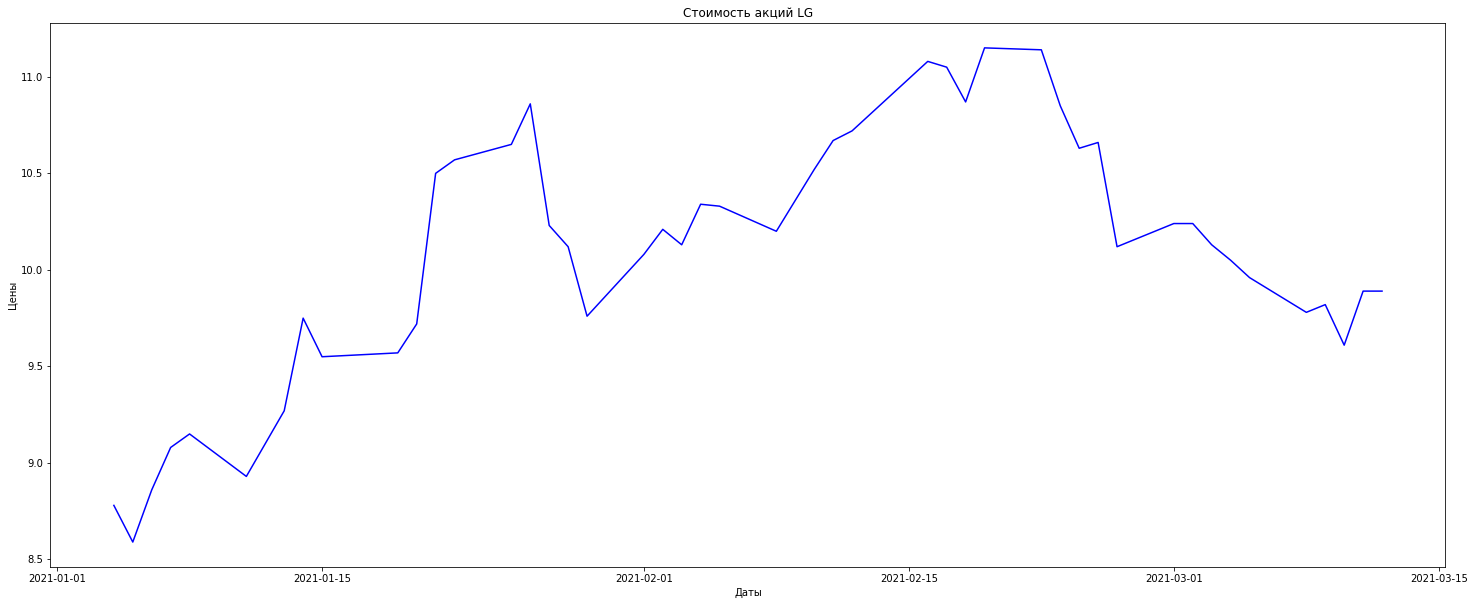

In [51]:
plt.figure(figsize = (25, 10))
plt.title('Стоимость акций LG') 
plt.xlabel('Даты') 
plt.ylabel('Цены') 
plt.plot(ts_fb['Open'], 'blue', label = 'Тренировочные данные')


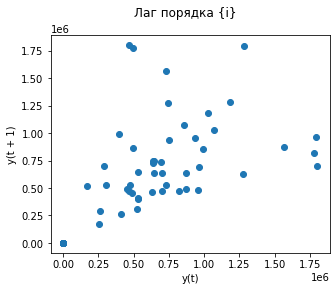

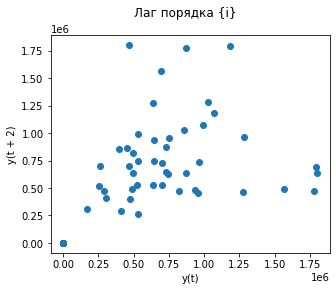

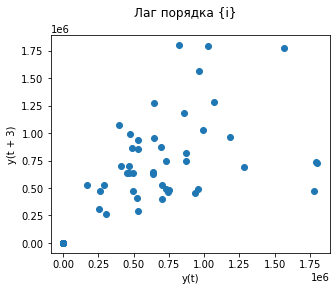

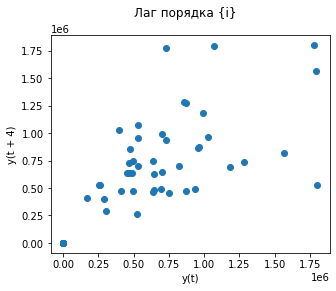

In [52]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle('Лаг порядка {i}')
    pd.plotting.lag_plot(ts_fb, lag=i, ax=ax)
    pyplot.show()

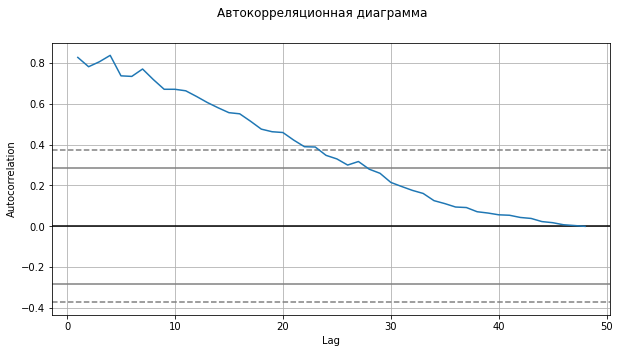

In [30]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(ts_fb, ax=ax)
pyplot.show()

In [37]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
train_data, test_data = ts_fb[0:int(len(ts_fb) * 0.8)], ts_fb[int(len(ts_fb) * 0.8):]

In [57]:
X_train = train_data['Open'].values
X_test = test_data['Open'].values

history = [x for x in X_train]
predictions = list()
for t in range(len(X_test)):
    model = ARIMA(history, order = (5, 1, 0)) 
    model_fit = model.fit() 
    output = model_fit.forecast() 
    yhat = output[0] 
    predictions.append(yhat) 
    obs = X_test[t] 
    history.append(obs) 
   
error = mean_squared_error(X_test, predictions)
error

0.021489398549166604

/tmp/ipykernel_6481/1248768572.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(ts_fb['Open'], 'green', color = 'blue', label = 'Тренировочные данные')


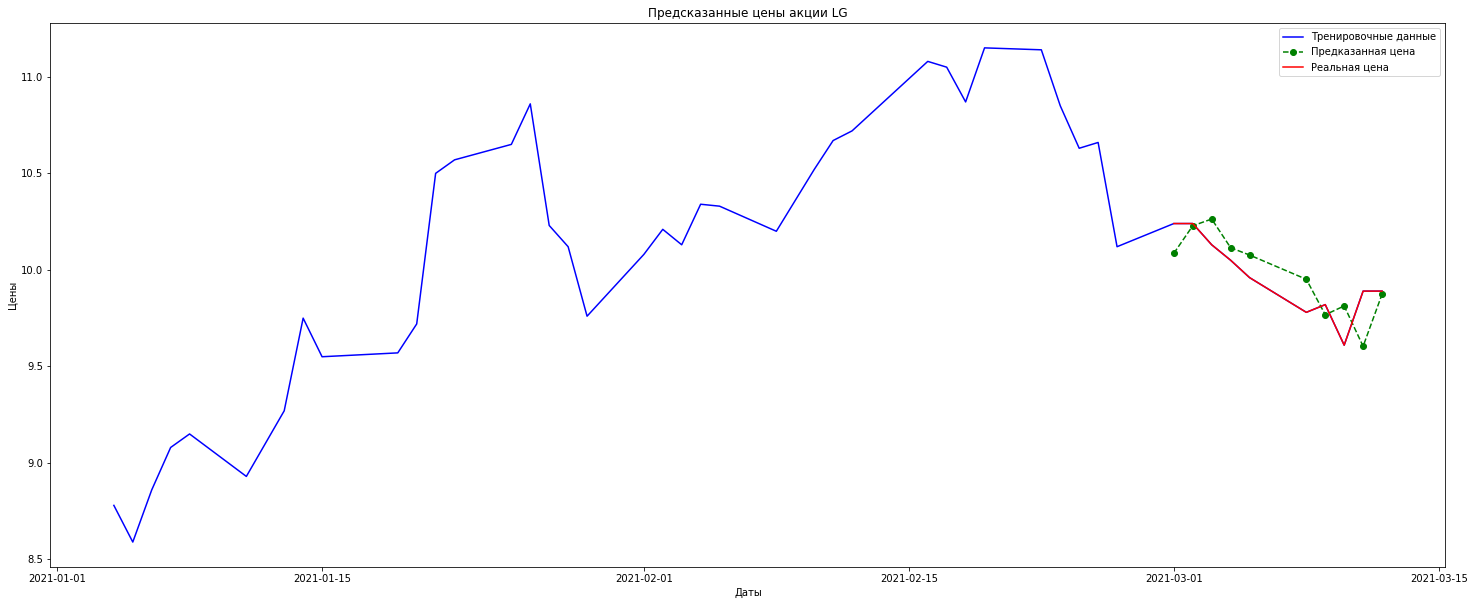

In [61]:
plt.figure(figsize = (25, 10))
plt.plot(ts_fb['Open'], 'green', color = 'blue', label = 'Тренировочные данные') 
plt.plot(test_data.index, predictions, color = 'green', marker = 'o', 
         linestyle = 'dashed', label = 'Предказанная цена') # Предсказания модели
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Реальная цена') # Реальные тестовые данные
plt.title('Предсказанные цены акции LG') 
plt.xlabel('Даты')
plt.ylabel('Цены')
plt.legend()